# How to make a Other DNA Structure

Structures can also be built from paths, or as random placements.

Paths can be used to seed a measured geometry, while random placements serve well when
generating isotropic DNA damage measurements

In [1]:
import sys
from pathlib import Path

try:
    # The voxelisation library produces the cubic voxelisation that
    # can be used to build DNA
    from fractaldna.structure_models import voxelisation as v
    from fractaldna.structure_models import random_placements as rp

except (ImportError, ModuleNotFoundError):
    sys.path.append(str(Path.cwd().parent.parent.parent))
    from fractaldna.structure_models import voxelisation as v
    from fractaldna.structure_models import random_placements as rp

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Producing Voxels from Random Placements

This method generates a random collection of prisms inside a ball.
It places candidate prisms in the volume of interest, ensuring there are
no overlaps.


In [2]:
placements = rp.generate_non_overlapping_prisms(
    10, np.array([100, 100, 200]), 500, early_exit=-1, verbose=True
)

100%|██████████| 10/10 [00:00<00:00, 575.44it/s]


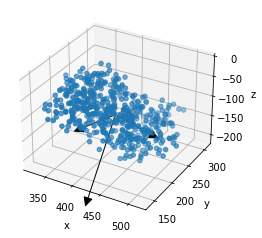

In [3]:
# A single prism can be plotted as a diagnostic,
# using random points inside the prism
# Arrows show the cardinal axes of the prism

placements.prisms[0].to_plot(n=500, arrows=True)

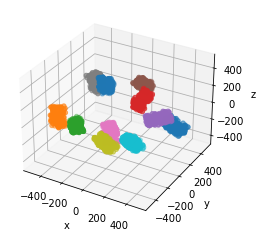

In [4]:
# Multiple prisms can be plotted together

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for prism in placements.prisms:
    prism.to_plot(ax=ax)

In [5]:
# And the output can be extracted as a Data Frame
placements.to_frame()

,IDX,TYPE,POS_X,POS_Y,POS_Z,EUL_PSI,EUL_THETA,EUL_PHI
0,0,prism,415.348520,219.712351,-114.423994,2.839435,0.720987,-2.984271
1,1,prism,-432.076027,-237.553875,-24.083225,-2.963485,0.275591,2.982139
2,2,prism,-159.592674,-392.947419,78.121664,1.882360,0.062193,-2.492313
3,3,prism,125.804152,179.063631,112.421050,0.192454,0.851023,1.541503
4,4,prism,396.528057,-50.657998,135.188644,1.464938,-0.688803,2.440295
5,5,prism,23.628732,402.649308,123.393114,-2.756459,-0.737142,0.798266
6,6,prism,-137.302603,106.387584,-328.511381,-0.239809,-0.454546,-0.187761
7,7,prism,-263.391776,91.491565,242.850182,-3.066083,-0.120225,-0.347392
8,8,prism,83.777441,-340.462284,-76.226070,0.010002,0.670432,-2.375796
9,9,prism,336.420935,-355.243091,35.149724,-0.356458,0.604563,-2.353776
